## Classification model to recognize texts

The objective of this notebook is to create a text classification model capable of identifying texts related to cybersecurity, environmental issues, and other categories

In [1]:
# Basic packages
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# preprocessing packages
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# building models packages
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from sklearn.multioutput import MultiOutputClassifier
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras import regularizers
from keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score
from keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier

### Exploratory data analysis
The objective of this EDA is to gain insights and a deeper understanding of the provided dataset. 

In [2]:
# Loading the training data
train_data = pd.read_csv('train.csv', index_col=[0])

In [3]:
# Displaying the first few rows of the training dataset
train_data.head()

,content,cyber_label,environmental_issue
0,All rights reserved. MA23-16258 988982046\n\nh...,NaN,0
1,Revisiting our purpose and/or values statement...,NaN,0
2,Amid ongoing strategic competition in a\nmulti...,NaN,0
3,"Source: PwC Pulse Survey, November 2, 2022: ba...",NaN,0
4,Executive Summary 2 \nAgeing and\nHealth Conce...,NaN,1


In [4]:
# Checking basic information about the data
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   content              1300 non-null   object 
 1   cyber_label          127 non-null    float64
 2   environmental_issue  1300 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 40.6+ KB
None


In [5]:
# Counting unique values in the 'cyber_label' and 'environmental_issue' columns
print("Unique values in 'cyber_label':", train_data['cyber_label'].unique())
print("Unique values in 'environmental_issue':", train_data['environmental_issue'].unique())

Unique values in 'cyber_label': [nan  1.]
Unique values in 'environmental_issue': [0 1]


/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


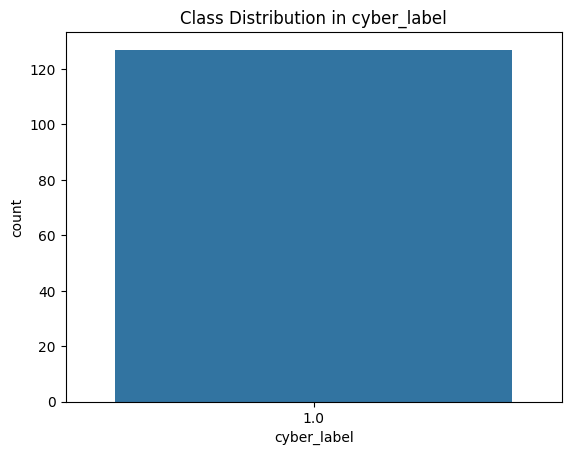

/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


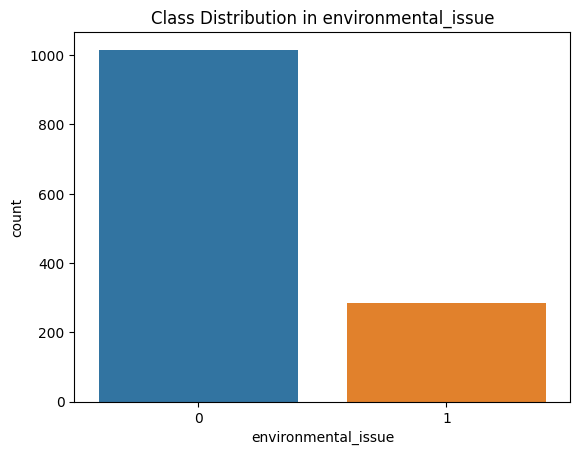

In [6]:
# Checking the class balance
sns.countplot(x='cyber_label', data=train_data)
plt.title('Class Distribution in cyber_label')
plt.show()

sns.countplot(x='environmental_issue', data=train_data)
plt.title('Class Distribution in environmental_issue')
plt.show()

In [7]:
# dealing with Null values
# Filling missing values with 0 in the 'cyber_label' column, and converting type
train_data['cyber_label'].fillna(0, inplace=True)
train_data['cyber_label'] = train_data['cyber_label'].astype(int)

/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


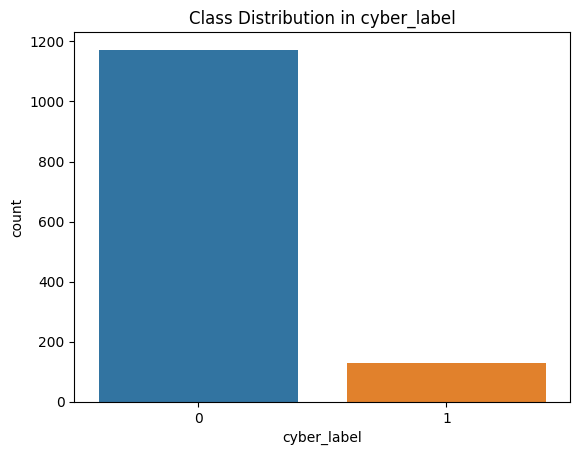

/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


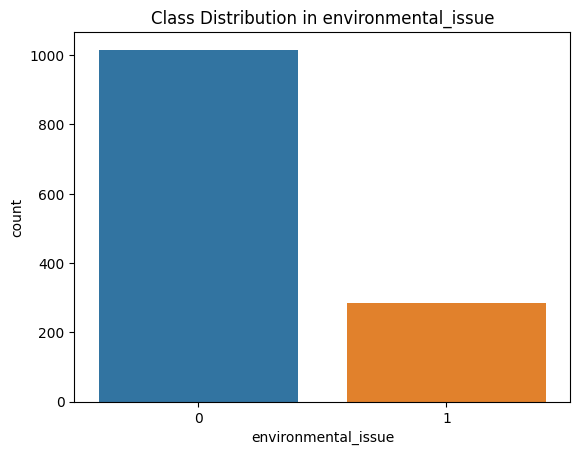

In [8]:
# Checking the class balance
sns.countplot(x='cyber_label', data=train_data)
plt.title('Class Distribution in cyber_label')
plt.show()

sns.countplot(x='environmental_issue', data=train_data)
plt.title('Class Distribution in environmental_issue')
plt.show()

In [9]:
# Count how many times a text is classified as both labels
count_both_labels = train_data[(train_data['cyber_label'] == 1) & (train_data['environmental_issue'] == 1)].shape[0]
print(f'The text is classified as both labels {count_both_labels} times.')

The text is classified as both labels 35 times.


In [10]:
# Count how many times a text is not classified as either label
count_neither_label = train_data[(train_data['cyber_label'] == 0) & (train_data['environmental_issue'] == 0)].shape[0]

print(f'The text is not classified as either label in {count_neither_label} instances.')

The text is not classified as either label in 924 instances.


In [11]:
# Descriptive statistics for the 'content' column
print(train_data['content'].describe())

count                                                  1300
unique                                                 1298
top       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
freq                                                      2
Name: content, dtype: object


In [12]:
# Average text length
train_data['content_length'] = train_data['content'].apply(len)
print(train_data['content_length'].describe())

count    1300.000000
mean     1201.832308
std       541.531061
min         1.000000
25%      1050.500000
50%      1204.000000
75%      1318.250000
max      6857.000000
Name: content_length, dtype: float64


/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/claesia/hiring_task_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


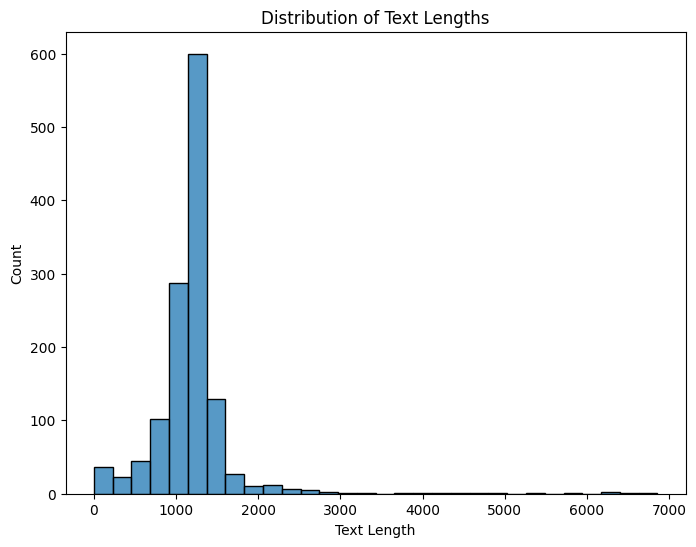

In [13]:
# Histogram of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(train_data['content_length'], bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.show()

### Data Preprocessing
The objective of this data preprocessing phase is to prepare the text data for subsequent analysis and modeling. 

Steps done:
- Stopwords and non-alphanumeric characters were removed, and performed lemmatization
- MultiLabelBinarizer is being used to encode the multi-label tags (cyber_label and environmental_issue). It converts the labels into a format that can be used to train and evaluate multi-label classification models.
- TF-IDF (Term Frequency-Inverse Document Frequency) vectorization transforms the text into numerical representations that can be used by the model.
- Tokenizer is used the to convert the texts into sequences of numbers (tokens), this allows the model to efficiently work with text by representing it as numerical sequences
- Pad_sequences to ensure that all sequences have the same length.

In [14]:
# Initialize the lemmatizer object
lemmatizer = WordNetLemmatizer()

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/claesia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Stopwords removal and lemmatization
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words and token.isalnum()]
    
    # Reconstruct the text from tokens
    return ' '.join(tokens)

In [16]:
# Apply preprocessing to the content
train_data['content_preprocessed'] = train_data['content'].apply(preprocess_text)

In [17]:
# Encoding labels
mlb = MultiLabelBinarizer()
encoded_labels = mlb.fit_transform(train_data[['cyber_label', 'environmental_issue']].values)

In [18]:
maxlen = int(train_data['content_preprocessed'].apply(len).describe().max())

In [19]:
# TF-IDF vectorization of text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Keep the max_features
tfidf_data = tfidf_vectorizer.fit_transform(train_data['content_preprocessed'])

In [20]:
# Tokenization and padding for CNN model
tokenizer = Tokenizer(num_words=5000)  # Keep the same max_features as TF-IDF
tokenizer.fit_on_texts(train_data['content_preprocessed'])
X_train_cnn = tokenizer.texts_to_sequences(train_data['content_preprocessed'])
X_train_cnn = pad_sequences(X_train_cnn, maxlen=maxlen)

### Model Building and Training

As analized during the EAD, a text can be classified in more than a label. So the best approach to deal with it is using multi-label classification models.

Below are the models used and the reason for their choice.

- Logistic Regression: Logistic Regression is a common choice for binary classification problems and can also be extended to multi-label classification tasks.
- RandomForest: it is known for its robustness and ability to handle imbalanced data, which is common in multilabel classification tasks where some classes may have fewer samples than others.
- CNN: can be applied to text processing, especially for detecting local patterns in sequences of words

##### To able to implement Logistic Regression and RandomForest for this task the MultiOutputClassifier is applied, it is used in multi-label classification tasks when you want to extend a binary classifier to predict multiple labels simultaneously. It simplifies model training, maintains the original model's structure, and ensures correct label correlations.

#### Using LogisticRegression and RandomForest

In [21]:
# Splitting into training (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(tfidf_data, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
# As noticed during the EDA, the dataset is unbalanced, class_weight='balanced'

# Create a MultiOutputClassifier with Logistic Regression as the base classifier
logistic_r_classifier = MultiOutputClassifier(LogisticRegression(class_weight='balanced'))

# Create a MultiOutputClassifier with Random Forest as the base classifier
random_f_classifier = MultiOutputClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))

# Train the model
random_f_history = random_f_classifier.fit(X_train, y_train)
logistic_history = logistic_r_classifier.fit(X_train, y_train)

In [23]:
unique, counts = np.unique(y_train, return_counts=True)

# Print the frequencies
print(np.asarray((unique, counts)).T)

[[   0  669]
 [   1 1151]]


#### Using CNN

In [24]:
class Network:
    """
    This class represents a neural network for binary multilabel classification.

    Parameters
    ----------
    model : str, optional (default='cnn')
        The type of neural network model to use.
    max_words : int, optional (default=5000)
        The maximum number of words in the vocabulary.
    max_sequence_length : int, optional (default=100)
        The maximum length of input sequences.

    Methods
    -------
    create_model()
        Creates the neural network model based on the specified configuration.
    """
    
    def __init__(self, model = 'cnn', max_words=5000, max_sequence_length=100):
        self.model_type = model
        self.max_words = max_words
        self.max_sequence_length = max_sequence_length

        def create_model(self):
            """
            Create a neural network model for binary multilabel classification.

            Returns
            -------
            model : keras.models.Sequential
                The compiled Keras model.
            """
            model = Sequential()
            model.add(Embedding(self.max_words, 128, input_length=self.max_sequence_length))
            model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
            model.add(MaxPooling1D(3))
            model.add(Flatten())
            model.add(Dense(64, activation='relu'))
            model.add(Dropout(0.8))
            model.add(Dense(2, activation='sigmoid'))  # Two output nodes for two labels
            return model
        
        self.model = create_model(self, )
        opt = Adam(learning_rate=0.001, decay=1e-6)
        self.model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#### Splitting the data

In [25]:
# Splitting into training (70%), validation (15%), and test (15%)
X_train_cnn, X_temp, y_train_cnn, y_temp = train_test_split(X_train_cnn, encoded_labels, test_size=0.3, random_state=42)
X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [26]:
from  sklearn.utils.class_weight import compute_class_weight
class_weights = dict(enumerate(compute_class_weight('balanced', classes = np.unique(train_data[['cyber_label', 'environmental_issue']]), y = np.ravel(train_data[['cyber_label', 'environmental_issue']].values))))

#### Create and train the model

In [27]:
cnn = Network(model = 'cnn', max_sequence_length=maxlen)
print(cnn.model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4775, 128)         640000    
                                                                 
 conv1d (Conv1D)             (None, 4773, 64)          24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 1591, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 101824)            0         
                                                                 
 dense (Dense)               (None, 64)                6516800   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

2023-09-18 09:09:24.871856: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-18 09:09:24.871914: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-18 09:09:24.871929: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-18 09:09:24.872015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-18 09:09:24.872054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
# Train the CNN model
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitors the loss on the validation set
    patience=5,  # Number of epochs with no improvement before stopping
    verbose=1,
    restore_best_weights=True  # Restores the model's weights with the best validation loss
)
cnn_history = cnn.model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size = 32, validation_data=(X_val_cnn, y_val_cnn), class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/10


2023-09-18 09:09:25.946185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 1.0819 - accuracy: 0.9385

2023-09-18 09:09:44.932484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 19s 655ms/step - loss: 1.0819 - accuracy: 0.9385 - val_loss: 0.9062 - val_accuracy: 0.9538
Epoch 2/10
29/29 [==============================] - 8s 289ms/step - loss: 0.7002 - accuracy: 0.9549 - val_loss: 0.7029 - val_accuracy: 0.9538
Epoch 3/10
29/29 [==============================] - 2s 73ms/step - loss: 0.5159 - accuracy: 0.9593 - val_loss: 0.5377 - val_accuracy: 0.9641
Epoch 4/10
29/29 [==============================] - 2s 72ms/step - loss: 0.4094 - accuracy: 0.9670 - val_loss: 0.4539 - val_accuracy: 0.9641
Epoch 5/10
29/29 [==============================] - 2s 72ms/step - loss: 0.3322 - accuracy: 0.9637 - val_loss: 0.4128 - val_accuracy: 0.9641
Epoch 6/10
29/29 [==============================] - 2s 72ms/step - loss: 0.2847 - accuracy: 0.9758 - val_loss: 0.3730 - val_accuracy: 0.9641
Epoch 7/10
29/29 [==============================] - 8s 268ms/step - loss: 0.2405 - accuracy: 0.9626 - val_loss: 0.3505 - val_accuracy: 0.9641
Epoch 8/10
29/29 [==

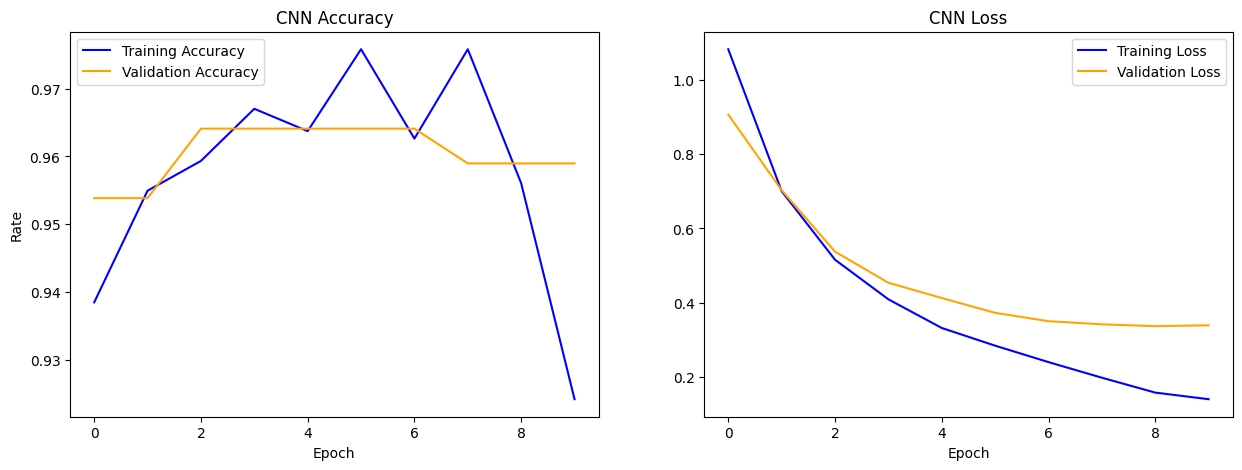

In [29]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(cnn_history.history["accuracy"],label="Training Accuracy",color="blue")
axe1[0].plot(cnn_history.history["val_accuracy"],label="Validation Accuracy",color="orange")
axe1[1].plot(cnn_history.history["loss"],label="Training Loss",color="blue")
axe1[1].plot(cnn_history.history["val_loss"],label="Validation Loss",color="orange")
axe1[0].title.set_text("CNN Accuracy")
axe1[1].title.set_text("CNN Loss")
axe1[0].legend(['Training Accuracy', 'Validation Accuracy'])
axe1[1].legend(['Training Loss', 'Validation Loss'])
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()

### Model Evaluation

#### Evaluating the model on the validation and test data

In [30]:
class ModelEvaluator:
    """
    This class provides methods for evaluating a multilabel classification model.

    Parameters
    ----------
    model : keras.models.Model
        The trained multilabel classification model.
    X_eval : array-like
        The evaluation input data.
    y_eval : array-like
        The ground truth labels for the evaluation data.
    classes : list
        The list of class names or labels.

    Attributes
    ----------
    y_pred : array-like
        The model's predicted labels for the evaluation data.
    y_true : array-like
        The ground truth labels for the evaluation data.
    model : keras.models.Model
        The trained multilabel classification model.
    X_eval : array-like
        The evaluation input data.
    classes : list
        The list of class labels.
    """
    def __init__(self, model, X_eval, y_eval , classes):
        # validating the model
        self.y_pred = model.predict(X_eval)
        self.y_true = y_eval
        self.model = model
        self.X_eval = X_eval
        self.classes = classes
        
        # Threshold the predictions
        self.y_pred[self.y_pred >= 0.5] = 1
        self.y_pred[self.y_pred < 0.5] = 0
        
    def evaluate_model(self):
        """
        Evaluate the multilabel classification model on the evaluation data.

        Returns
        -------
        evaluation_results : list
            A list of evaluation results including loss and accuracy.
        """
        return self.model.evaluate(self.X_eval, self.y_true)
    
    def classification_report(self):
        """
        Generate a classification report, including precision, recall, and F1-score.

        Returns
        -------
        class_report : str
            The classification report as a formatted string.
        """
        return classification_report(self.y_true, self.y_pred, target_names=self.classes)
    
    def format_confusion_matrix(self, matrix):
        """
        Format the confusion matrix for better readability.

        Parameters
        ----------
        matrix : array
            The confusion matrix to be formatted.

        Returns
        -------
        formatted_matrix : str
            The formatted confusion matrix as a string.
        """
        TP, FP, FN, TN = matrix.ravel()
        return f"        Actual 1    Actual 0\nPredicted 1:   {TP}         {FP}\nPredicted 0:   {FN}         {TN}"

    def confusion_matrix(self):
        """
        Compute and return confusion matrices for each output.

        Returns
        -------
        cm_output_1 : str
            The formatted confusion matrix for the first output.
        cm_output_2 : str
            The formatted confusion matrix for the second output.
        """
        
        confusion_matrix_output_1 = confusion_matrix(self.y_true[:, 0], self.y_pred[:, 0])

        
        confusion_matrix_output_2 = confusion_matrix(self.y_true[:, 1], self.y_pred[:, 1])
        
        return self.format_confusion_matrix(confusion_matrix_output_1), self.format_confusion_matrix(confusion_matrix_output_2)

    def accuracy(self):
        """
        Compute the accuracy score for the model's predictions.

        Returns
        -------
        accuracy_score : float
            The accuracy score.
        """
        return accuracy_score(self.y_true, self.y_pred)

    def precision(self):
        """
        Compute the precision score for the model's predictions.

        Returns
        -------
        precision_score : float
            The precision score.
        """
        return precision_score(self.y_true, self.y_pred, average='macro')

    def recall(self):
        """
        Compute the recall score for the model's predictions.

        Returns
        -------
        recall_score : float
            The recall score.
        """
        return recall_score(self.y_true, self.y_pred, average='macro')

    def f1_score(self):
        """
        Compute the F1-score for the model's predictions.

        Returns
        -------
        f1_score : float
            The F1-score.
        """
        return f1_score(self.y_true, self.y_pred, average='macro')

In [31]:
print("Evaluate the Logistic Regression model on the test data")
evaluator = ModelEvaluator(logistic_r_classifier, X_test, y_test, list(map(str,mlb.classes_)))
# evaluation metrics
print("Accuracy: {:.2f}%".format(evaluator.accuracy() * 100))
print("Precision: {:.2f}".format(evaluator.precision()))
print("Recall: {:.2f}".format(evaluator.recall()))
print("F1 Score: {:.2f}".format(evaluator.f1_score()))
print(evaluator.classification_report())
val, test = evaluator.confusion_matrix()
print(val)
print(test)

Evaluate the Logistic Regression model on the test data
Accuracy: 76.92%
Precision: 0.81
Recall: 0.85
F1 Score: 0.83
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       192
           1       0.65      0.73      0.68        55

   micro avg       0.90      0.91      0.91       247
   macro avg       0.81      0.85      0.83       247
weighted avg       0.91      0.91      0.91       247
 samples avg       0.93      0.94      0.92       247

        Actual 1    Actual 0
Predicted 1:   0         3
Predicted 0:   7         185
        Actual 1    Actual 0
Predicted 1:   118         22
Predicted 0:   15         40


/Users/claesia/hiring_task_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print("Evaluate the RandomForest model on the test data")
evaluator = ModelEvaluator(random_f_classifier, X_test, y_test, list(map(str,mlb.classes_)))
# evaluation metrics
print("Accuracy: {:.2f}%".format(evaluator.accuracy() * 100))
print("Precision: {:.2f}".format(evaluator.precision()))
print("Recall: {:.2f}".format(evaluator.recall()))
print("F1 Score: {:.2f}".format(evaluator.f1_score()))
print(evaluator.classification_report())
val, test = evaluator.confusion_matrix()
print(val)
print(test)

Evaluate the RandomForest model on the test data
Accuracy: 77.95%
Precision: 0.86
Recall: 0.71
F1 Score: 0.76
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       192
           1       0.74      0.42      0.53        55

   micro avg       0.95      0.87      0.91       247
   macro avg       0.86      0.71      0.76       247
weighted avg       0.93      0.87      0.89       247
 samples avg       0.97      0.91      0.92       247

        Actual 1    Actual 0
Predicted 1:   0         3
Predicted 0:   1         191
        Actual 1    Actual 0
Predicted 1:   132         8
Predicted 0:   32         23


In [33]:
print("Evaluate the CNN model on the test data")
evaluator = ModelEvaluator(cnn.model, X_test_cnn, y_test_cnn, list(map(str,mlb.classes_)))
# evaluation metrics
print("Accuracy: {:.2f}%".format(evaluator.accuracy() * 100))
print("Precision: {:.2f}".format(evaluator.precision()))
print("Recall: {:.2f}".format(evaluator.recall()))
print("F1 Score: {:.2f}".format(evaluator.f1_score()))
print(evaluator.classification_report())
print(evaluator.evaluate_model())
val, test = evaluator.confusion_matrix()
print(val)
print(test)

Evaluate the CNN model on the test data
4/7 [================>.............] - ETA: 0s

2023-09-18 09:10:21.107023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 21ms/step
Accuracy: 74.36%
Precision: 0.80
Recall: 0.70
F1 Score: 0.74
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       192
           1       0.61      0.40      0.48        55

   micro avg       0.93      0.86      0.89       247
   macro avg       0.80      0.70      0.74       247
weighted avg       0.90      0.86      0.88       247
 samples avg       0.95      0.91      0.91       247

7/7 [==============================] - 0s 20ms/step - loss: 0.3103 - accuracy: 0.9692
[0.3102671205997467, 0.9692307710647583]
        Actual 1    Actual 0
Predicted 1:   0         3
Predicted 0:   1         191
        Actual 1    Actual 0
Predicted 1:   126         14
Predicted 0:   33         22


#### Based on these metrics, the RandomForest model appears to have the best performance in terms of accuracy and precision. However, the Logistic Regression model has a high recall score. The CNN model also shows reasonable performance but benefit from further improvement/adjustemnt.

### Run on test dataset

In [49]:
# Load and preprocess the test dataset
test_data = pd.read_csv('test.csv', index_col=[0])
test_data['content_preprocessed'] = test_data['content'].apply(preprocess_text)

# Tokenization and padding for CNN model
tokenizer = Tokenizer(num_words=5000)  # Keep the same max_features as TF-IDF
tokenizer.fit_on_texts(test_data['content_preprocessed'])
X_test_cnn = tokenizer.texts_to_sequences(test_data['content_preprocessed'])
X_test_cnn = pad_sequences(X_test_cnn, maxlen=maxlen)

In [50]:

predictions = cnn.model.predict(X_test_cnn)

5/5 [==============================] - 0s 23ms/step


##### The test.csv dataset is unlabelled, which means that in order to assess the performance of a model on this dataset, it would require a process of human labelling. Another possible approach is to treat it as an anomaly detection problem. Here, the model is trained to distinguish between the data it was trained on (considered 'normal') and the unlabelled test data, which might contain anomalies or deviations.

##### Alternatively, semi-supervised learning can be explored, it is a technique that combines both labeled and unlabeled data during training. Labeled data provides information about the relationship between input and output variables, while the unlabeled data helps capture the underlying data structure. This approach can be particularly useful when obtaining labels for the entire test dataset is challenging or costly."

In [51]:
test_data.head()

,content,content_preprocessed
0,More recently there has been a focus on risks ...,recently focus risk pollution plastic litter d...
1,Energy crisis ↑\n3. Business interruption ↓\n\...,energy crisis business interruption impact ene...
2,The survey results indicate that a lack of ski...,survey result indicate lack skilled talent ava...
3,Respondents could\nselect more than one risk.0...,respondent could select one 10 20 30 40 50 70 ...
4,The interest payable on\nthe country's public ...,interest payable country public debt expected ...
